# Individual Project 4
---
**Author:** Dylan Tulett  
**Version:** 1.0  
**Date:** March 2021  

## 1.0 Reading in and Formating the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from pylab import savefig


ckd, meta = arff.loadarff('chronic_kidney_disease.arff')

ckd = pd.DataFrame(ckd)

ckd.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
5,60.0,90.0,b'1.015',b'3',b'0',b'?',b'?',b'notpresent',b'notpresent',74.0,...,39.0,7800.0,4.4,b'yes',b'yes',b'no',b'good',b'yes',b'no',b'ckd'
6,68.0,70.0,b'1.010',b'0',b'0',b'?',b'normal',b'notpresent',b'notpresent',100.0,...,36.0,NaN,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
7,24.0,NaN,b'1.015',b'2',b'4',b'normal',b'abnormal',b'notpresent',b'notpresent',410.0,...,44.0,6900.0,5.0,b'no',b'yes',b'no',b'good',b'yes',b'no',b'ckd'
8,52.0,100.0,b'1.015',b'3',b'0',b'normal',b'abnormal',b'present',b'notpresent',138.0,...,33.0,9600.0,4.0,b'yes',b'yes',b'no',b'good',b'no',b'yes',b'ckd'
9,53.0,90.0,b'1.020',b'2',b'0',b'abnormal',b'abnormal',b'present',b'notpresent',70.0,...,29.0,12100.0,3.7,b'yes',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'


In [3]:
len(ckd)

400

In [4]:
ckd.dtypes

age      float64
bp       float64
sg        object
al        object
su        object
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

###  1.1 Formatting The Nominal Columns
- notice that all the nominal data are wrapped in b''
- lets get rid of this

In [5]:
def bgone(column):
    """
    Arguments: column (ex. bgone(sg))
    Action: takes every datapoint in that column and removes b'' wrapper.
    """
    for row in range(len(ckd[column])):
        ckd[column][row] = str(ckd[column][row]).split("'")[1]
        
#executing funciton for each column
for column in ckd:
    if ckd[column].dtypes == 'object':
        bgone(column)

<ipython-input-5-6fc75308687b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ckd[column][row] = str(ckd[column][row]).split("'")[1]


In [5]:
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,?,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,?,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


Better now.

## 2.0 Getting Variable Data
1. Setting up and saving a table on variable types and missing data.
2. Displaying and saving summary statistics on all numerical variables.
3. Setting up and saving a table on all categorical variables frequencies and proportions.

### 2.1 Getting and saving out variables and missing data

In [6]:
def missingData(column):
    """
    Arguments: column = the column that you would like to know 
    percentage of missing data for.
    Action: function returns the missing data as a percentage of the whole column.
    You will notice that for all of the nominal data, missing datapoints are entered as 
    '?'. We will take advantage of this.
    """
    if ckd[column].dtypes == 'float64':
        missing_percentage = ((400 - (ckd[column].count()))/400)*100
    elif ckd[column].dtypes == 'object' and '?' in list(ckd[column]):
        missing_percentage = ((ckd[column].value_counts()['?'])/400)*100
    elif ckd[column].dtypes == 'object' and '?' not in list(ckd[column]):
        missing_percentage = 0
    return missing_percentage
        

In [7]:
ckd_variables = pd.DataFrame({
    'Variable Name' : list(map(lambda x: ckd.columns[x], range(25))),
    'Data Type' : list(map(lambda x: ckd.dtypes[x], range(25))),
    'Missing Data' : list(map(lambda x: missingData(ckd.columns[x]), range(25)))
})

### 2.2 Saving summary data about numerical data

In [8]:
summary_statistics = ckd.describe().T
summary_statistics.to_csv('summary_statistics.csv')
summary_statistics

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.0,42.0,55.00,64.5,90.0
bp,388.0,76.469072,13.683637,50.0,70.0,80.00,80.0,180.0
bgr,356.0,148.036517,79.281714,22.0,99.0,121.00,163.0,490.0
bu,381.0,57.425722,50.503006,1.5,27.0,42.00,66.0,391.0
sc,383.0,3.072454,5.741126,0.4,0.9,1.30,2.8,76.0
sod,313.0,137.528754,10.408752,4.5,135.0,138.00,142.0,163.0
pot,312.0,4.627244,3.193904,2.5,3.8,4.40,4.9,47.0
hemo,348.0,12.526437,2.912587,3.1,10.3,12.65,15.0,17.8
pcv,329.0,38.884498,8.990105,9.0,32.0,40.00,45.0,54.0
wbcc,294.0,8406.122449,2944.474190,2200.0,6500.0,8000.00,9800.0,26400.0


### 2.3 Getting and saving out proportion data on categorical variable

In [9]:
def proportionOfTotal(variable):
    """
    This 
    Arguments: variable = the variable/column name from the ckd dataset
    Action: creates three lists (category, frequency, proportion) and puts them into a dataset.
    Then returns the dataset.
    """
    temp = ckd[variable].groupby(ckd[variable]).count()
    categories = list(map(lambda x: temp.index[x], range(len(temp))))
    frequency = list(map(lambda x: temp[x], range(len(temp))))
    proportion = list(map(lambda x: (frequency[x]/temp.sum())*100, range(len(temp))))

    proportion_variable = pd.DataFrame({
        'Category' : categories,
        'Frequency' : frequency,
        'Proportion (%)' : proportion
    })
    return(proportion_variable)
    

In [10]:
for column in ckd:
    if ckd[column].dtypes == 'object':
        proportions = proportionOfTotal(column)
        proportions.to_csv(f'{column}_proportions.csv')

## 3.0 Vizualizing the Data
1. Displaying and saving correlation chart
2. Creating and saving heatmap of correlation
3. Distribution plots
4. Bar plots

### 3.1 Displaying and saving correlation chart

In [14]:
correlation_data = ckd.corr()
correlation_data.to_csv('ckd_correlation.csv')
correlation_data

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
age,1.000000,0.159480,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,0.159480,1.000000,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
bgr,0.244992,0.160193,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,0.196985,0.188517,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,0.132531,0.146222,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,-0.100046,-0.116422,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
pot,0.058377,0.075151,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309
hemo,-0.192928,-0.306540,-0.306189,-0.610360,-0.401670,0.365183,-0.133746,1.000000,0.895382,-0.169413,0.798880
pcv,-0.242119,-0.326319,-0.301385,-0.607621,-0.404193,0.376914,-0.163182,0.895382,1.000000,-0.197022,0.791625
wbcc,0.118339,0.029753,0.150015,0.050462,-0.006390,0.007277,-0.105576,-0.169413,-0.197022,1.000000,-0.158163


### 3.2 Creating and saving heatmap 

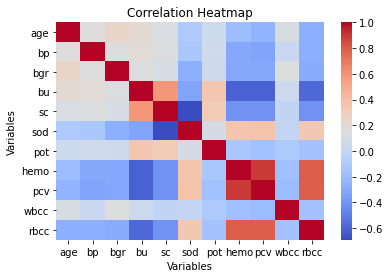

In [13]:
ax = plt.axes()
heatmap = sns.heatmap(ckd.corr(), ax = ax, cmap='coolwarm')

ax.set_title('Correlation Heatmap')
ax.set_ylabel('Variables')
ax.set_xlabel('Variables')

heatmap = heatmap.get_figure()

heatmap.savefig('heatmap.png', dpi=100)

### 3.3 Researching data distribution

In [13]:
ckd.groupby(ckd['class']).mean()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
class,,,,,,,,,,,
ckd,54.541322,79.625000,175.419811,72.389030,4.414916,133.901786,4.878443,10.647549,32.939891,9069.536424,3.945238
notckd,46.516779,71.351351,107.722222,32.798611,0.868966,141.731034,4.337931,15.188194,46.335616,7705.594406,5.379021


In [14]:
def ageBoxplot(variable):
    ax1 = ckd.boxplot(column = 'age', by = variable, showfliers=False)
    ax1.set_title('')
    ax1.set_ylabel('Age')
    ax1.set_xlabel(variable)
    ax1.grid(False)

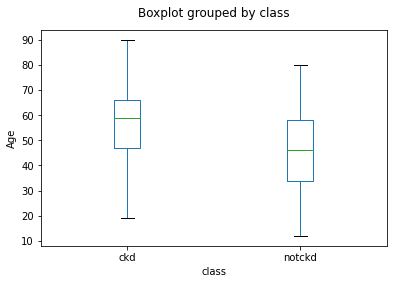

In [15]:
ageBoxplot('class')

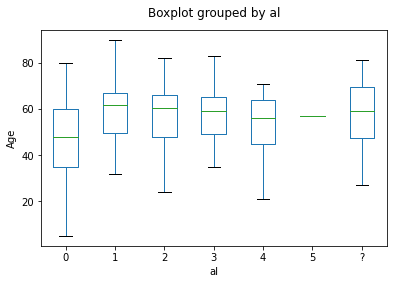

In [16]:
ageBoxplot('al')

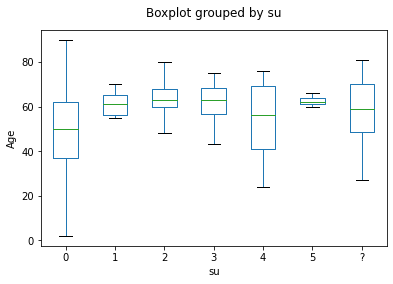

In [17]:
ageBoxplot('su')

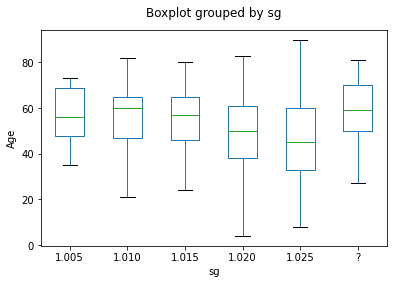

In [18]:
ageBoxplot('sg')

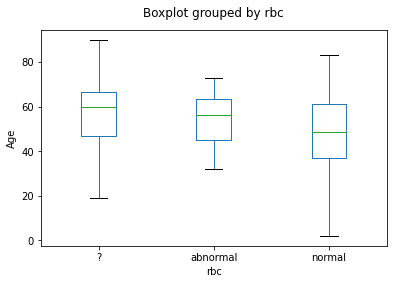

In [19]:
ageBoxplot('rbc')

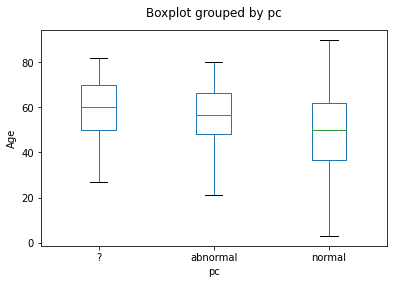

In [20]:
ageBoxplot('pc')

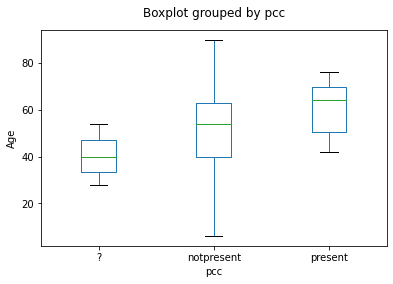

In [21]:
ageBoxplot('pcc')

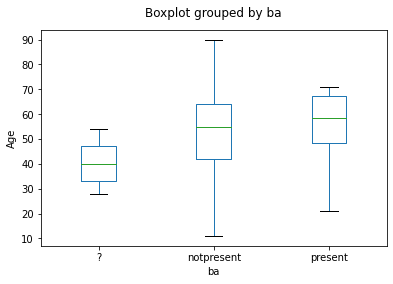

In [22]:
ageBoxplot('ba')

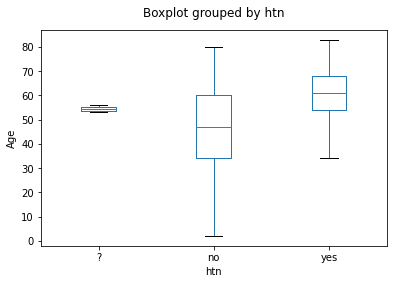

In [23]:
ageBoxplot('htn')

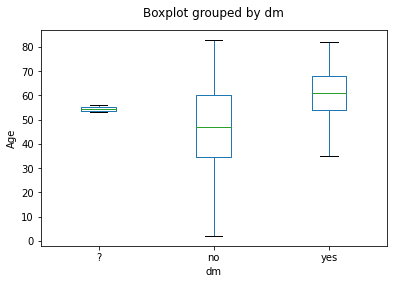

In [24]:
ageBoxplot('dm')

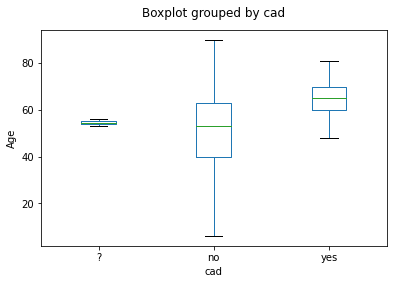

In [25]:
ageBoxplot('cad')

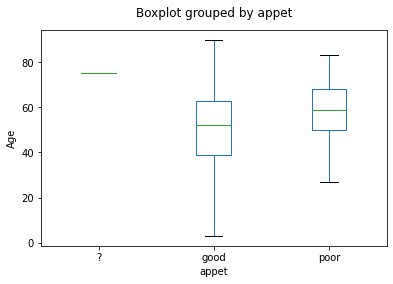

In [26]:
ageBoxplot('appet')

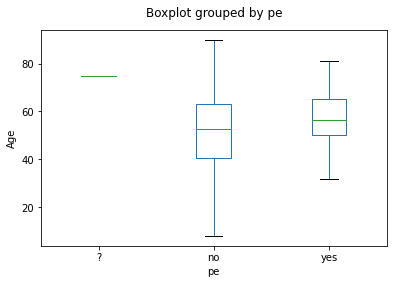

In [27]:
ageBoxplot('pe')

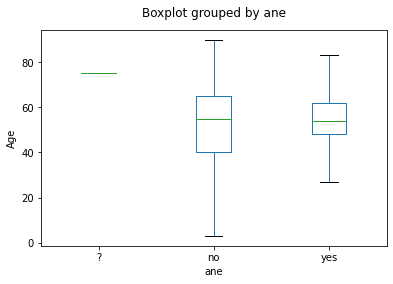

In [28]:
ageBoxplot('ane')

### Now going to do boxplots based on 'class'
- seeing what is different in ckd patients

In [96]:
def classBoxplot(variable, ylabel):
    """
    Aruments: 
        Variable = numerical data column in ckd dataset
        ylabel = label you want to give to the y axis
    Action: 
        Produces a box and whisker plot to show you distributin of a column with 
        two groups (ckd, notckd).
        Then saves the figure as "boxplot_{variable}.png"
    """
    ax1 = ckd.boxplot(column = variable, by = 'class', showfliers=False)
    ax1.set_title('')
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel('Diagnosis')
    ax1.grid(False)

    fig = ax1.get_figure()

    fig.savefig(f'boxplot_{variable}.png')

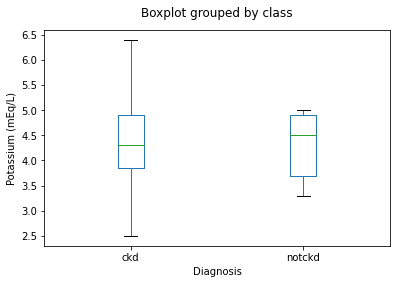

In [80]:
classBoxplot('pot', 'Potassium (mEq/L)')

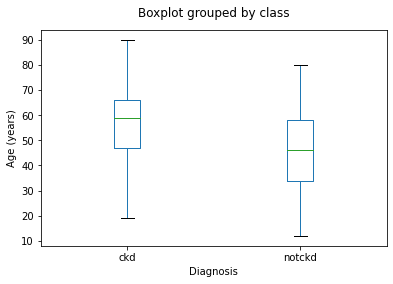

In [81]:
classBoxplot('age', 'Age (years)')

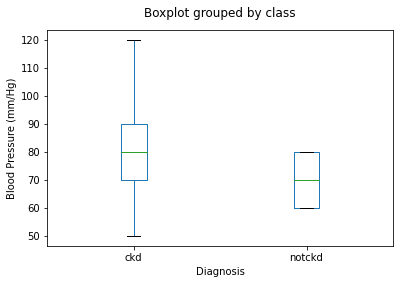

In [82]:
classBoxplot('bp', 'Blood Pressure (mm/Hg)')

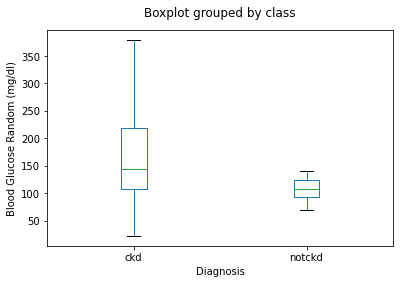

In [83]:
classBoxplot('bgr', 'Blood Glucose Random (mg/dl)')

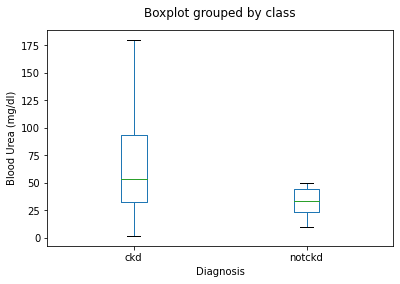

In [84]:
classBoxplot('bu', 'Blood Urea (mg/dl)')

I am noticing that a lot of the ckd distributions have a much larger spread and IQ range than the notckd distributions. Definitely want to note that in the report.

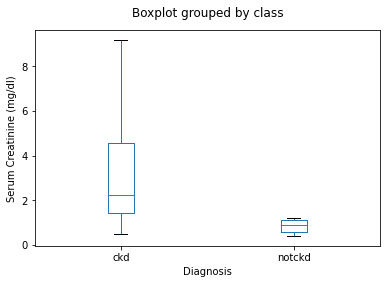

In [85]:
classBoxplot('sc', 'Serum Creatinine (mg/dl)')

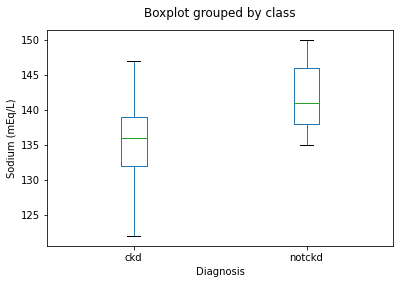

In [86]:
classBoxplot('sod', 'Sodium (mEq/L)')

Interesting that the sodium mean is actually decreased. Possibly due to a lack of reuptake in the kidneys? again we see a larger range in ckd patients.

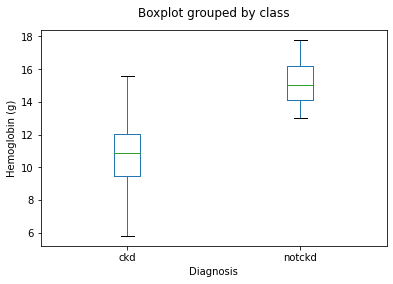

In [87]:
classBoxplot('hemo', 'Hemoglobin (g)')

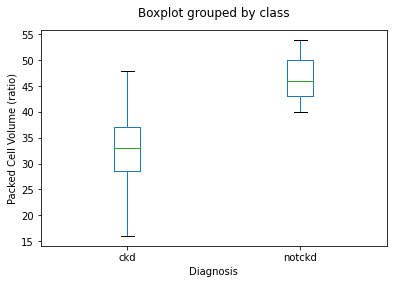

In [88]:
classBoxplot('pcv', 'Packed Cell Volume (ratio)')

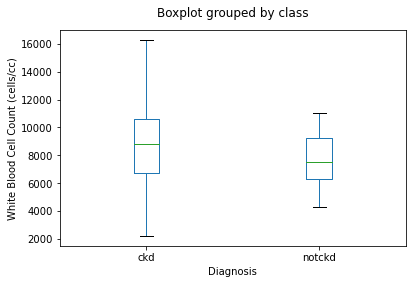

In [91]:
classBoxplot('wbcc', 'White Blood Cell Count (cells/cc)')

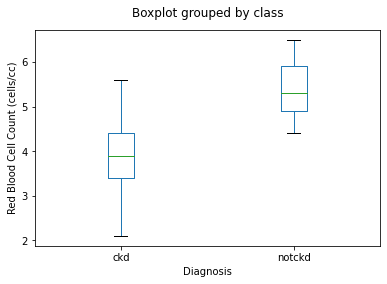

In [90]:
classBoxplot('rbcc', 'Red Blood Cell Count (cells/cc)')

### 3.4 Scatterplots/Pairwise

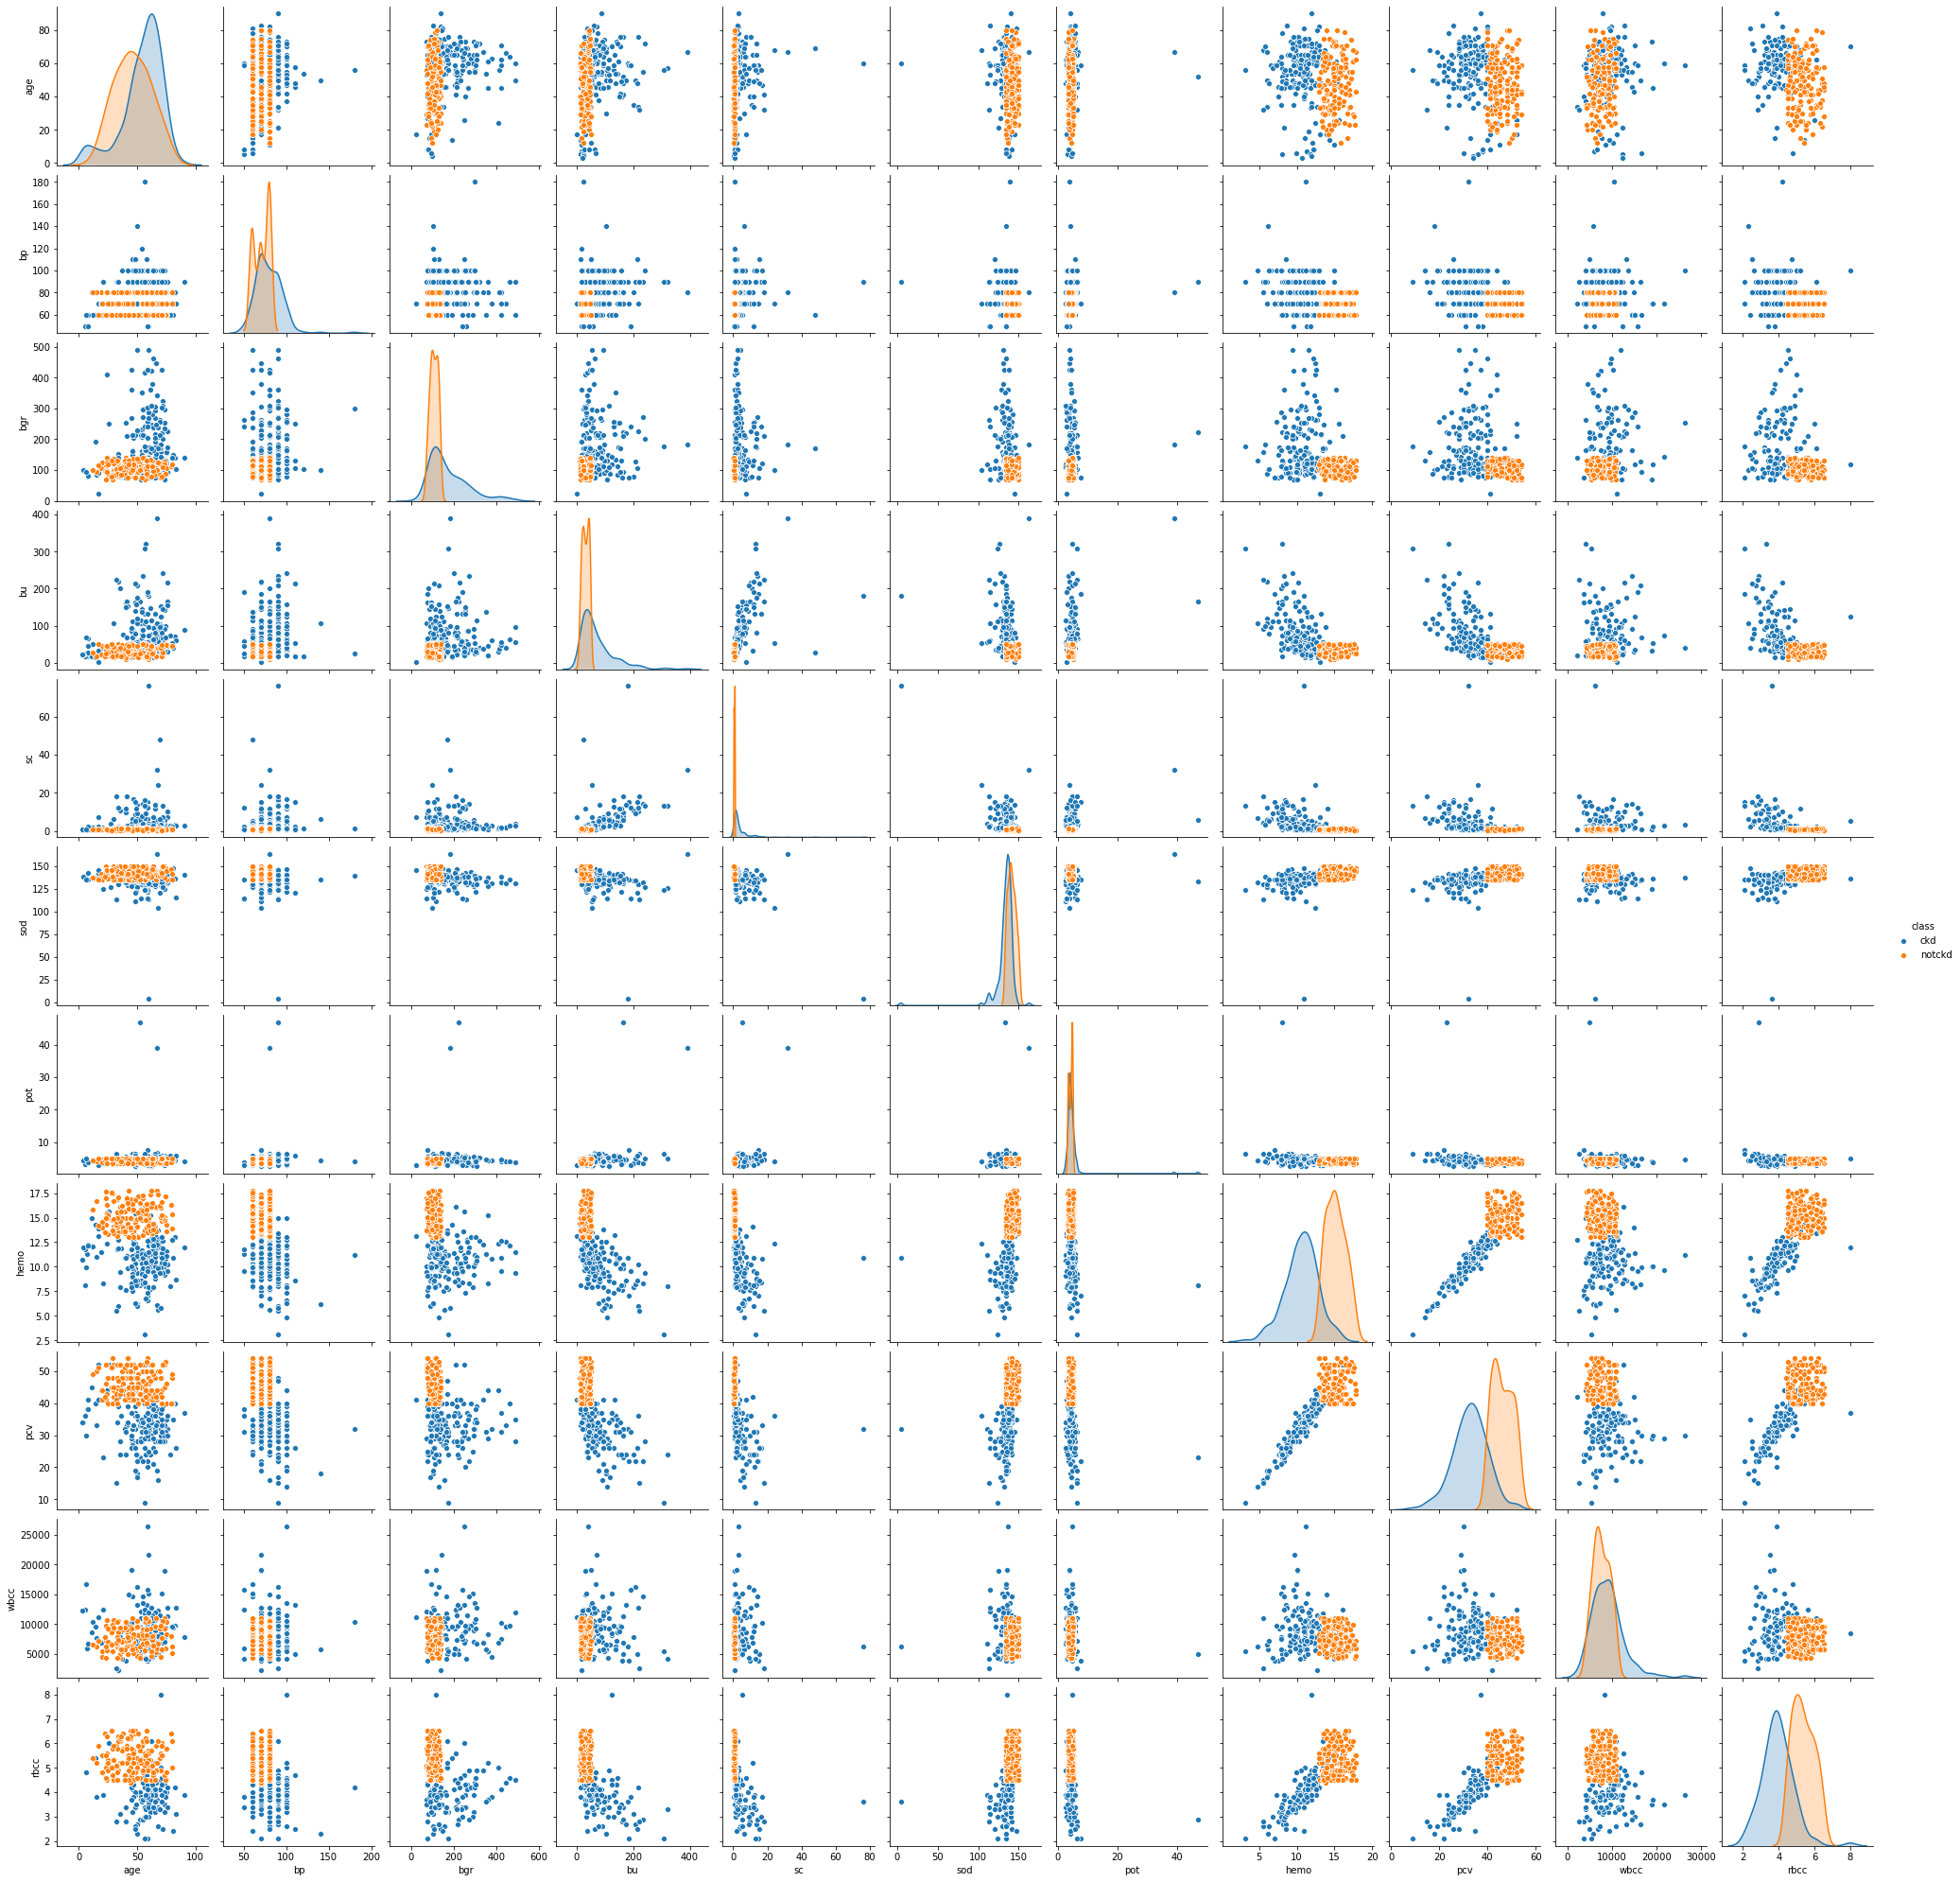

In [207]:
fig = sns.pairplot(ckd, hue='class')
fig.savefig('pairplot.png', dpi=100)
fig

There are some good correlations there, just need to isolate them so they are more visible 

Text(0.5, 0, 'Hemoglobin (grams)')

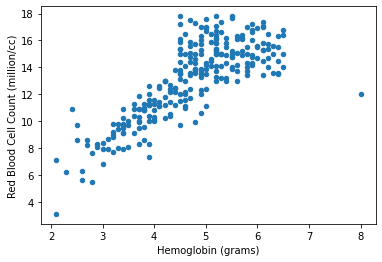

In [339]:
fig = ckd.plot(kind='scatter', x='rbcc',y='hemo')
fig.set_ylabel('Red Blood Cell Count (million/cc)')
fig.set_xlabel('Hemoglobin (grams)')

Text(0.5, 0, 'Hemoglobin (grams)')

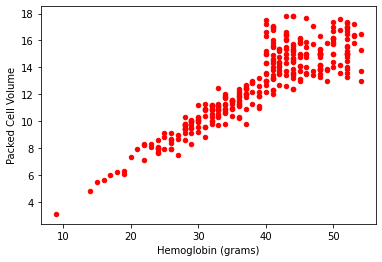

In [272]:
fig = ckd.plot(kind='scatter', x='pcv',y='hemo', color='red')
fig.set_ylabel('Packed Cell Volume')
fig.set_xlabel('Hemoglobin (grams)')

Notice the similarity in these trends. I think ill put these charts together for display. 

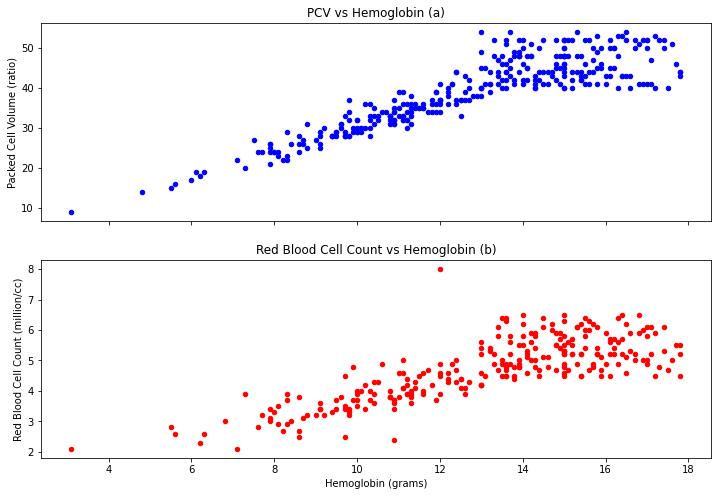

In [343]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,8))
ckd.plot(
    kind='scatter', 
    x='hemo',y='pcv',
    ax=axes[0],
    color='blue',
    title='PCV vs Hemoglobin (a)',
)
axes[0].set_ylabel('Packed Cell Volume (ratio)')

ckd.plot(
    kind='scatter', 
    x='hemo', y='rbcc', 
    ax=axes[1], 
    color='red', 
    title='Red Blood Cell Count vs Hemoglobin (b)',
)
axes[1].set_ylabel('Red Blood Cell Count (million/cc)')
axes[1].set_xlabel('Hemoglobin (grams)')
plt.savefig('bloodcells_hemoglobin.png')

### 3.5 Bar Charts/other
- for the bar charts I will look at interesting things from the whisker plots and do more specific analysis instead of making lots of bar charts.

In [124]:
ckd.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [136]:
len(ckd['su'].groupby(ckd['class']).count())


2

In [208]:
def barPlot(variable, var_name):
    """
    Aruments: 
        Variable = categorical data column in ckd dataset
        var_name = Full name of variable (that a human would read).
    Action: 
        Produces a bargraph to show group frequencies of a specific categorical column.
        Then saves the figure as "bar_{variable}.png"
    """
    data = ckd[variable].groupby(ckd[variable]).count()
    

    width = 0.8 # width of the bars

    fig= plt.bar(data.index, data.values, color = 'green')
    plt.title(f'{var_name} Group Frequencies')
    plt.ylabel('Number of Patients')
    plt.xlabel(f'{var_name} Groups')
    
    
    plt.savefig(f'bar_{variable}')

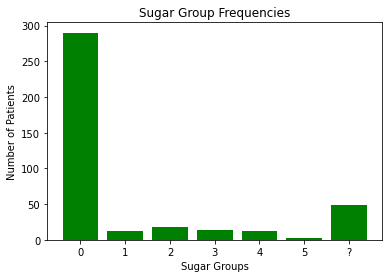

In [176]:
barPlot('su', 'Sugar')

In [177]:
ckd.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

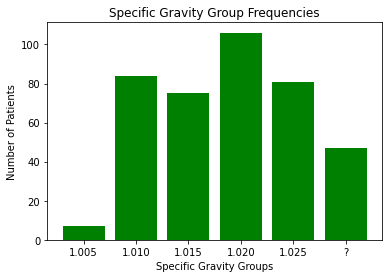

In [178]:
barPlot('sg', 'Specific Gravity')

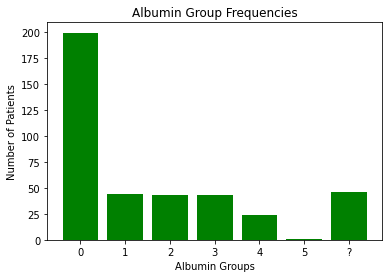

In [180]:
barPlot('al', 'Albumin')

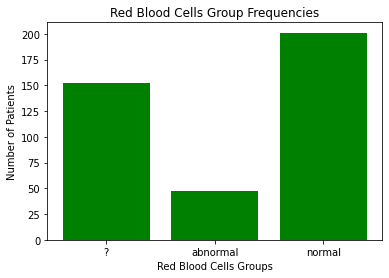

In [182]:
barPlot('rbc', 'Red Blood Cells')

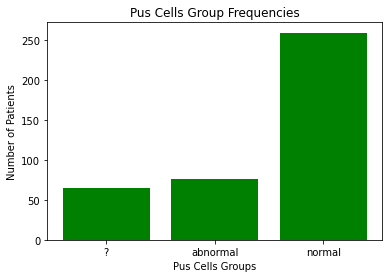

In [184]:
barPlot('pc', 'Pus Cells')

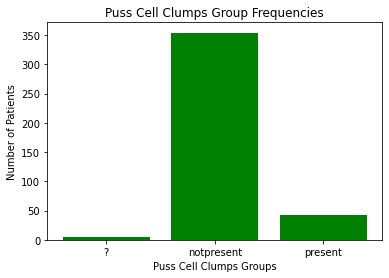

In [186]:
barPlot('pcc', 'Puss Cell Clumps')

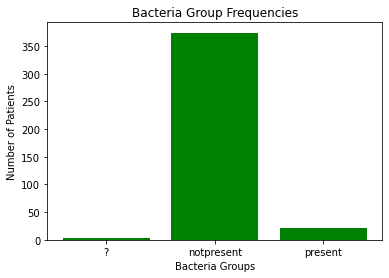

In [188]:
barPlot('ba', 'Bacteria')

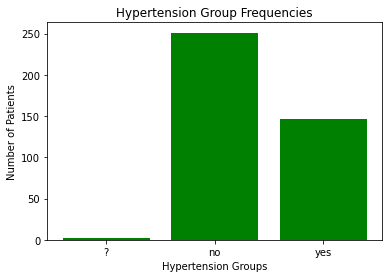

In [190]:
barPlot('htn', 'Hypertension')

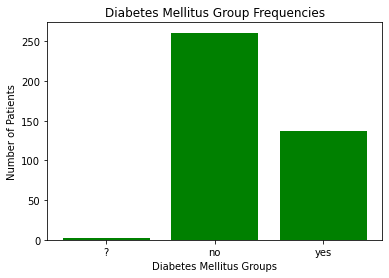

In [193]:
barPlot('dm','Diabetes Mellitus')

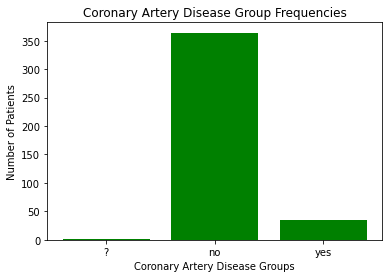

In [195]:
barPlot('cad', 'Coronary Artery Disease')

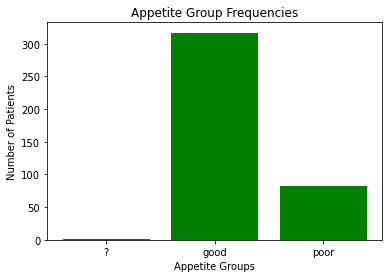

In [197]:
barPlot('appet', 'Appetite')

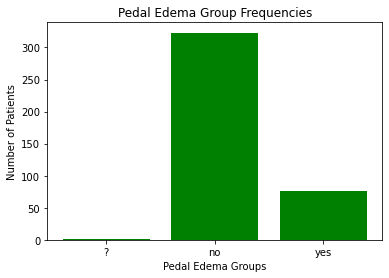

In [199]:
barPlot('pe', 'Pedal Edema')

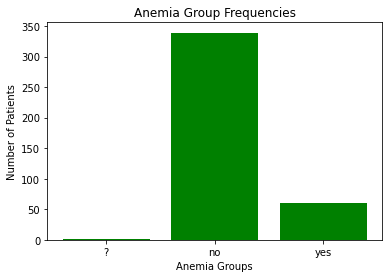

In [201]:
barPlot('ane', 'Anemia')

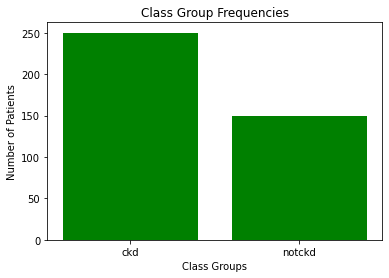

In [203]:
barPlot('class', 'Class')

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 2.,  2., 13., 17., 29., 44., 33., 31., 29., 32., 30.,  6.,  8.,
         5.,  1.,  3.,  3.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.]),
 array([ 2200.        ,  3006.66666667,  3813.33333333,  4620.        ,
         5426.66666667,  6233.33333333,  7040.        ,  7846.66666667,
         8653.33333333,  9460.        , 10266.66666667, 11073.33333333,
        11880.        , 12686.66666667, 13493.33333333, 14300.        ,
        15106.66666667, 15913.33333333, 16720.        , 17526.66666667,
        18333.33333333, 19140.        , 19946.66666667, 20753.33333333,
        21560.        , 22366.66666667, 23173.33333333, 23980.        ,
        24786.66666667, 25593.33333333, 26400.        ]),
 <a list of 30 Patch objects>)

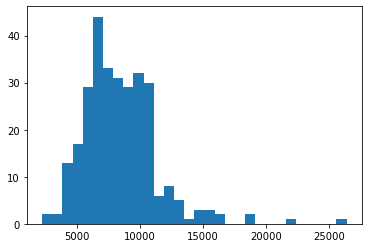

In [212]:
plt.hist(ckd.wbcc, bins=30)

In [214]:
al = ckd['al'].groupby(ckd['al']).count()

In [215]:
al = al.drop('?')

In [216]:
al

al
0    199
1     44
2     43
3     43
4     24
5      1
Name: al, dtype: int64